# Milestone 1 Phase 2

Holla.. Irpan Habibi's here from Batch 004 Hacktiv8's Fulltime Data Science Programs

**About Dataset**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


## Problem

**Customer churn** is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

## Import Necessary Libraries and Data Sets

In [1]:
# Import Libraries

from collections import Counter

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Exploratory Data Analysis

In [3]:
df.shape

(7043, 21)

In [4]:
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [7]:
# View column names

cols = df.columns
print(f"Dataset Columns:\n{cols}")

Dataset Columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
# view duplicates data

df_duplicated = df[df.duplicated()]
df_duplicated

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [9]:
# check missing value

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df1 = df.copy()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df1.sample(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
4512  0707-HOVVN  Female              1      No         No      70   
1973  9675-ICXCT    Male              0     Yes        Yes      72   
3147  8903-WMRNW  Female              0     Yes         No      15   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
4512          Yes           Yes             DSL             No  ...   
1973          Yes            No             DSL            Yes  ...   
3147          Yes            No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
4512              Yes         Yes         Yes              No        Two year   
1973              Yes         Yes         Yes             Yes        Two year   
3147              Yes          No         Yes             Yes  Month-to-month   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
4512              Yes  Bank transfer (automatic)          75.50       5212.65   
1973              Yes           Electronic check          80.80       5728.55   
3147               No           Electronic check         101.75        1669.4   

     Churn  
4512    No  
1973    No  
3147    No  

[3 rows x 21 columns]

Columns **TotalCharges** seems string although it has numerical, I will change data type from object into float64

In [13]:
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"],errors = 'coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Lets drop **customerID** column because this column will not affect our target column

In [14]:
df1.drop("customerID",axis=1, inplace=True)

In [15]:
df1.select_dtypes("object").columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [16]:
for i in df1.select_dtypes("object").columns:
    print(f"Column {i} has these type of data: {df1[i].nunique()}")
    print("====================================================")

Column gender has these type of data: 2
Column Partner has these type of data: 2
Column Dependents has these type of data: 2
Column PhoneService has these type of data: 2
Column MultipleLines has these type of data: 3
Column InternetService has these type of data: 3
Column OnlineSecurity has these type of data: 3
Column OnlineBackup has these type of data: 3
Column DeviceProtection has these type of data: 3
Column TechSupport has these type of data: 3
Column StreamingTV has these type of data: 3
Column StreamingMovies has these type of data: 3
Column Contract has these type of data: 3
Column PaperlessBilling has these type of data: 2
Column PaymentMethod has these type of data: 4
Column Churn has these type of data: 2


All of the columns can be convertible into numerical values because they have 2, 3 and 4 different values.

Here we use `pd.get_dummies()` function or order to transform categorical columns into dummy numbers

In [17]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [18]:
df2=pd.get_dummies(data=df1,columns=categorical_features,drop_first=True)
df2

SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn  gender_Male  \
0                 0       1           29.85         29.85    No            0   
1                 0      34           56.95       1889.50    No            1   
2                 0       2           53.85        108.15   Yes            1   
3                 0      45           42.30       1840.75    No            1   
4                 0       2           70.70        151.65   Yes            0   
...             ...     ...             ...           ...   ...          ...   
7038              0      24           84.80       1990.50    No            1   
7039              0      72          103.20       7362.90    No            0   
7040              0      11           29.60        346.45    No            0   
7041              1       4           74.40        306.60   Yes            1   
7042              0      66          105.65       6844.50    No            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1               0               0                 1   
2               0               0                 1   
3               0               0                 0   
4               0               0                 1   
...           ...             ...               ...   
7038            1               1                 1   
7039            1               1                 1   
7040            1               1                 0   
7041            1               0                 1   
7042            0               0                 1   

      MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                                  1  ...                                0   
1                                  0  ...                                0   
2                                  0  ...                                0   
3                                  1  ...                                0   
4                                  0  ...                                0   
...                              ...  ...                              ...   
7038                               0  ...                                0   
7039                               0  ...                                0   
7040                               1  ...                                0   
7041                               0  ...                                0   
7042                               0  ...                                0   

      StreamingTV_Yes  StreamingMovies_No internet service  \
0                   0                                    0   
1                   0                                    0   
2                   0                                    0   
3                   0                                    0   
4                   0                                    0   
...               ...                                  ...   
7038                1                                    0   
7039                1                                    0   
7040                0                                    0   
7041                0                                    0   
7042                1                                    0   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                       0                  0                  0   
1                       0                  1                  0   
2                       0                  0                  0   
3                       0                  1                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
7038                    1                  1                  0   
7039                    1                  1                  0   
7040                    0                  0                  0   
7041                    0       

### Data Visualization

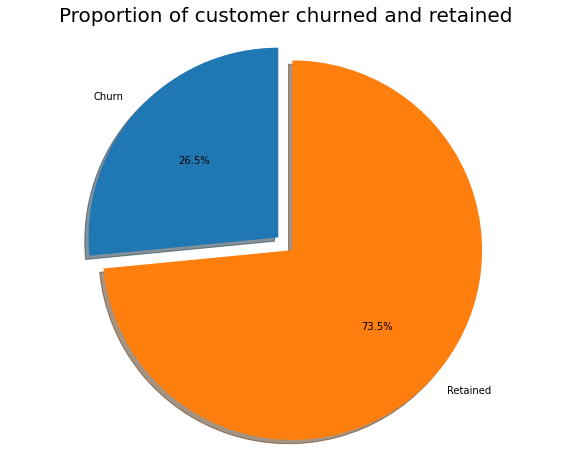

In [19]:
labels = 'Churn', 'Retained'
sizes = [df2.Churn[df2["Churn"]=="Yes"].count(), df2.Churn[df2["Churn"]=="No"].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 26.5% of the customers have churned while 73.5% have retained. So the baseline model could be to predict that 26.5% of the customers will churn. This means that we have **unbalanced target**

- **Contract Type - Churn Relationship :**

In [20]:
df1["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

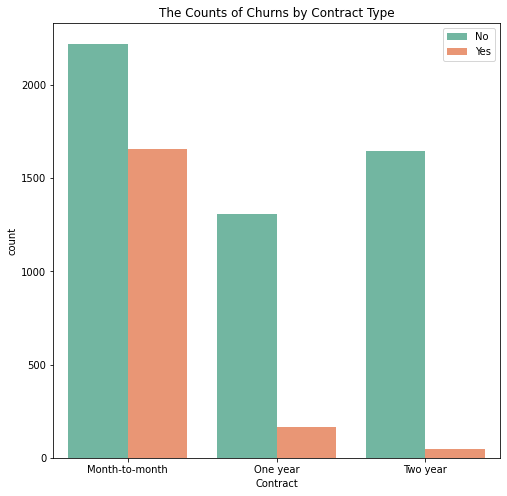

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x="Contract",hue="Churn", data=df1, palette="Set2")
plt.title("The Counts of Churns by Contract Type")
plt.legend()

Almost 40% of **month to month contract** have churned according to the table above. The percentage is very low when it comes to customers with One Year Contract and and customers with Two Year Contract. Therefore, this firm should focus more on the customers month ot month customer and make campaigns to retain them.

- **Gender- Churn Relationship :**

In [22]:
print(df1["Churn"][df1["Churn"]=="No"].groupby(by=df1["gender"]).count())
print("=========================")
print(df1["Churn"][df1["Churn"]=="Yes"].groupby(by=df1["gender"]).count())

gender
Female    2549
Male      2625
Name: Churn, dtype: int64
gender
Female    939
Male      930
Name: Churn, dtype: int64


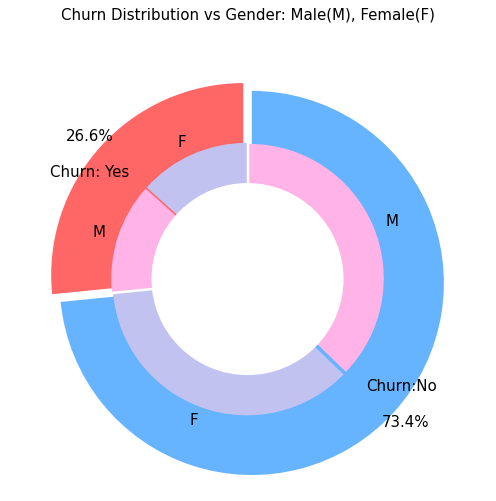

In [23]:
plt.figure(figsize=(7, 7))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution vs Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

There is no positive or negative correlation between gender and Churn. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.Therefore,we can say that there is no need to make a special focus on gender type in order retain customers.

- **Payment - Churn Relationship :**

In [24]:
labels = df1['PaymentMethod'].unique()
values = df1['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [25]:
fig = px.histogram(df1, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution vs Churn</b>")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

I have already found that people tend to churn if payment method is electronic ckeck when ckecking correlarion in the previous section.This figure demonstrates that people have higher rate of churn if payment method is electronic check. Therefore, company should deal with more with electronic check payment method and make some precautions.

- **Internet Service - Churn Relationship :**

In [26]:
labels = df1['InternetService'].unique()
values = df1['InternetService'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Internet Service Types Distribution</b>")
fig.show()

In [27]:
fig = px.histogram(df1, x="Churn", color="InternetService", title="<b>Internet Service Types distribution vs Churn</b>")
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

I have already found that people with fiber optic internet service tend to churn. This figure complies with this result. People with no internet service are stable and retain in the company. I think people with faster internet service like fiber optic can reach internet faster and can find find other options that can be better than this company. Hence, this company should make some ads and campaigns in order to attract customers with fiber optic internet service.

- **Dependents - Churn Relationship :**

In [28]:
labels = df1['Dependents'].unique()
values = df1['Dependents'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Dependents Distribution</b>")
fig.show()

In [29]:
color_map = {"Yes": "blue", "No": "red"}
fig = px.histogram(df1, x="Churn", color="Dependents",title="<b>Dependents distribution vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

The figure above points out that customers without dependents are more likely to churn from the company.

- **Partners - Churn Relationship :**

In [30]:
labels = df1['Partner'].unique()
values = df1['Partner'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Partners Distribution</b>")
fig.show()

In [31]:
color_map = {"Yes": "blue", "No": "red"}
fig = px.histogram(df1, x="Churn", color="Partner",title="<b>Partner distribution vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

The figure shows that customers without partners are more likely to churn. In this sense, this company may prioritize to organize campaigns and ads towards customers without partners in order to retain them in the company.

- **Senior Citizen - Churn Relationship :**

In [32]:
labels = df1['SeniorCitizen'].unique()
values = df1['SeniorCitizen'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b> Senior Citizen Distribution</b>")
fig.show()

In [33]:
color_map = {"Yes": 'blue', "No": "red"}
fig = px.histogram(df1, x="Churn", color="SeniorCitizen",title="<b>Senior Citizen vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

The figure shows that most of the senior citizens churn, thus senior citizen have very high rate of churn that the company should take of seriously so as to retain them.

- **Online Security - Churn Relationship :**

In [34]:
color_map = {"Yes": "blue", "No": "yellow"}
fig = px.histogram(df1, x="Churn", color="OnlineSecurity",title="<b>Online Security vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

The figure shows that customers tend to churn if there is no online internet security. Therefore, the more company increase online security in its services, the higher it will retain its customers.

- **Paperless Billing - Churn Relationship :**

In [35]:
color_map = {"Yes": "yellow", "No": "aqua"}
fig = px.histogram(df1, x="Churn", color="PaperlessBilling",title="<b>Paperless Billing vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

The figure shows that paperless billing is risky for the company, thus it will be a good strategy to send bills in paper form to retain its customers instead of paperless and digital options.

- **Technical Support - Churn Relationship :**

In [36]:
color_map = {"Yes": "blue", "No": "yellow"}
fig = px.histogram(df1, x="Churn", color="TechSupport",title="<b>Technical Support vs Churn</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=600, bargap=0.1)
fig.show()

The figure shows that customers without enough technical support will migrate to the other companies. Therefore, we can say that providing enough technical support to the customers is very important for customer retention.

- **Total Charces - Churn Relationship :**

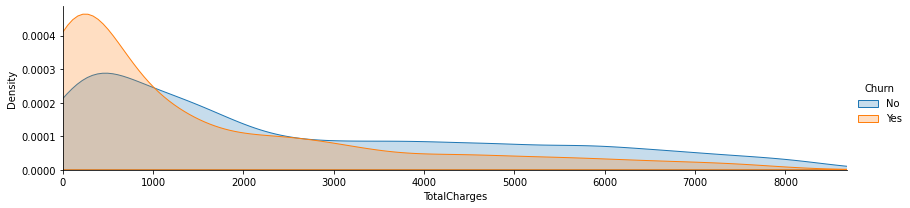

In [37]:
vs = sns.FacetGrid(df1, hue='Churn', aspect=4)
vs.map(sns.kdeplot, 'TotalCharges', shade=True)
vs.set(xlim=(0,df1['TotalCharges'].max()))
vs.add_legend()

Both churn customers and retained customer have similar distribution with regard to total charges.

- **Tenure - Churn Relationship :**

In [38]:
fig = px.box(df1, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=900, height=700,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

The figure shows that new customers tend to churn more than old customers. Therefore, new customers are risky group in terms of churn and needs more campaigns and attraction in order to retain them as customers in the future.

In [39]:
# transform the target columns "Churns" into numerical column in order to show statistical relation between target and features

df3 = pd.get_dummies(data=df1,columns=df1.select_dtypes("object").columns,drop_first=False)
df3.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0       1           29.85         29.85              1   
1              0      34           56.95       1889.50              0   
2              0       2           53.85        108.15              0   
3              0      45           42.30       1840.75              0   
4              0       2           70.70        151.65              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                  0                  0                    0   
1                  1                  0                    1   
2                  0                  0                    0   
3                  1                  0                    1   
4                  0                  0                    0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                     1                                        0   
1                     0                                        0   
2                     1                                        0   
3                     0                                        1   
4                     1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn_No  Churn_Yes  
0                           0         1          0  
1                           1         1          0  
2                           1         0          1  
3                           0         1          0  
4                           0         0          1  

[5 rows x 47 columns]

In [40]:
# Get overall statistical information on our features

df3.describe(include="all").transpose()

count         mean          std  \
SeniorCitizen                            7043.0     0.162147     0.368612   
tenure                                   7043.0    32.371149    24.559481   
MonthlyCharges                           7043.0    64.761692    30.090047   
TotalCharges                             7032.0  2283.300441  2266.771362   
gender_Female                            7043.0     0.495244     0.500013   
gender_Male                              7043.0     0.504756     0.500013   
Partner_No                               7043.0     0.516967     0.499748   
Partner_Yes                              7043.0     0.483033     0.499748   
Dependents_No                            7043.0     0.700412     0.458110   
Dependents_Yes                           7043.0     0.299588     0.458110   
PhoneService_No                          7043.0     0.096834     0.295752   
PhoneService_Yes                         7043.0     0.903166     0.295752   
MultipleLines_No                         7043.0     0.481329     0.499687   
MultipleLines_No phone service           7043.0     0.096834     0.295752   
MultipleLines_Yes                        7043.0     0.421837     0.493888   
InternetService_DSL                      7043.0     0.343746     0.474991   
InternetService_Fiber optic              7043.0     0.439585     0.496372   
InternetService_No                       7043.0     0.216669     0.412004   
OnlineSecurity_No                        7043.0     0.496663     0.500024   
OnlineSecurity_No internet service       7043.0     0.216669     0.412004   
OnlineSecurity_Yes                       7043.0     0.286668     0.452237   
OnlineBackup_No                          7043.0     0.438450     0.496232   
OnlineBackup_No internet service         7043.0     0.216669     0.412004   
OnlineBackup_Yes                         7043.0     0.344881     0.475363   
DeviceProtection_No                      7043.0     0.439443     0.496355   
DeviceProtection_No internet service     7043.0     0.216669     0.412004   
DeviceProtection_Yes                     7043.0     0.343888     0.475038   
TechSupport_No                           7043.0     0.493114     0.499988   
TechSupport_No internet service          7043.0     0.216669     0.412004   
TechSupport_Yes                          7043.0     0.290217     0.453895   
StreamingTV_No                           7043.0     0.398978     0.489723   
StreamingTV_No internet service          7043.0     0.216669     0.412004   
StreamingTV_Yes                          7043.0     0.384353     0.486477   
StreamingMovies_No                       7043.0     0.395428     0.488977   
StreamingMovies_No internet service      7043.0     0.216669     0.412004   
StreamingMovies_Yes                      7043.0     0.387903     0.487307   
Contract_Month-to-month                  7043.0     0.550192     0.497510   
Contract_One year                        7043.0     0.209144     0.406726   
Contract_Two year                        7043.0     0.240664     0.427517   
PaperlessBilling_No                      7043.0     0.407781     0.491457   
PaperlessBilling_Yes                     7043.0     0.592219     0.491457   
PaymentMethod_Bank transfer (automatic)  7043.0     0.219225     0.413751   
PaymentMethod_Credit card (automatic)    7043.0     0.216101     0.411613   
PaymentMethod_Electronic check           7043.0     0.335794     0.472301   
PaymentMethod_Mailed check               7043.0     0.228880     0.420141   
Churn_No                                 7043.0     0.734630     0.441561   
Churn_Yes                                7043.0     0.265370     0.441561   

                                           min     25%       50%        75%  \
SeniorCitizen                             0.00    0.00     0.000     0.0000   
tenure                                    0.00    9.00    29.000    55.0000   
MonthlyCharges                           18.25   35.50    70.350    89.8500   
TotalCharges                 

In [41]:
df3.corr()[["Churn_Yes","Churn_No"]].sort_values(by="Churn_Yes",ascending=False) 
#Here we can see the correlations between features and churning

Churn_Yes  Churn_No
Churn_Yes                                 1.000000 -1.000000
Contract_Month-to-month                   0.405103 -0.405103
OnlineSecurity_No                         0.342637 -0.342637
TechSupport_No                            0.337281 -0.337281
InternetService_Fiber optic               0.308020 -0.308020
PaymentMethod_Electronic check            0.301919 -0.301919
OnlineBackup_No                           0.268005 -0.268005
DeviceProtection_No                       0.252481 -0.252481
MonthlyCharges                            0.193356 -0.193356
PaperlessBilling_Yes                      0.191825 -0.191825
Dependents_No                             0.164221 -0.164221
SeniorCitizen                             0.150889 -0.150889
Partner_No                                0.150448 -0.150448
StreamingMovies_No                        0.130845 -0.130845
StreamingTV_No                            0.128916 -0.128916
StreamingTV_Yes                           0.063228 -0.063228
StreamingMovies_Yes                       0.061382 -0.061382
MultipleLines_Yes                         0.040102 -0.040102
PhoneService_Yes                          0.011942 -0.011942
gender_Female                             0.008612 -0.008612
gender_Male                              -0.008612  0.008612
PhoneService_No                          -0.011942  0.011942
MultipleLines_No phone service           -0.011942  0.011942
MultipleLines_No                         -0.032569  0.032569
DeviceProtection_Yes                     -0.066160  0.066160
OnlineBackup_Yes                         -0.082255  0.082255
PaymentMethod_Mailed check               -0.091683  0.091683
PaymentMethod_Bank transfer (automatic)  -0.117937  0.117937
InternetService_DSL                      -0.124214  0.124214
PaymentMethod_Credit card (automatic)    -0.134302  0.134302
Partner_Yes                              -0.150448  0.150448
Dependents_Yes                           -0.164221  0.164221
TechSupport_Yes                          -0.164674  0.164674
OnlineSecurity_Yes                       -0.171226  0.171226
Contract_One year                        -0.177820  0.177820
PaperlessBilling_No                      -0.191825  0.191825
TotalCharges                             -0.199484  0.199484
DeviceProtection_No internet service     -0.227890  0.227890
OnlineSecurity_No internet service       -0.227890  0.227890
StreamingMovies_No internet service      -0.227890  0.227890
StreamingTV_No internet service          -0.227890  0.227890
OnlineBackup_No internet service         -0.227890  0.227890
TechSupport_No internet service          -0.227890  0.227890
InternetService_No                       -0.227890  0.227890
Contract_Two year                        -0.302253  0.302253
tenure                                   -0.352229  0.352229
Churn_No                                 -1.000000  1.000000

**According to these values above and in the figure below,people will be tend to churn if** :

1. their contract type is month to month 
2. there is no online security
3. there is no technical support to the customer
4. internet service is fiber optic
5. payment method is electronic check
6. there is no online backup
7. there is no device protection
8. there is monthly charges
9. there is paperless billing

**According to these valuues,people will not churn if** :

1. there is higher tenure 
2. there is two years period contract
3. there is no internet service
4. there is no streaming TV

<AxesSubplot:>

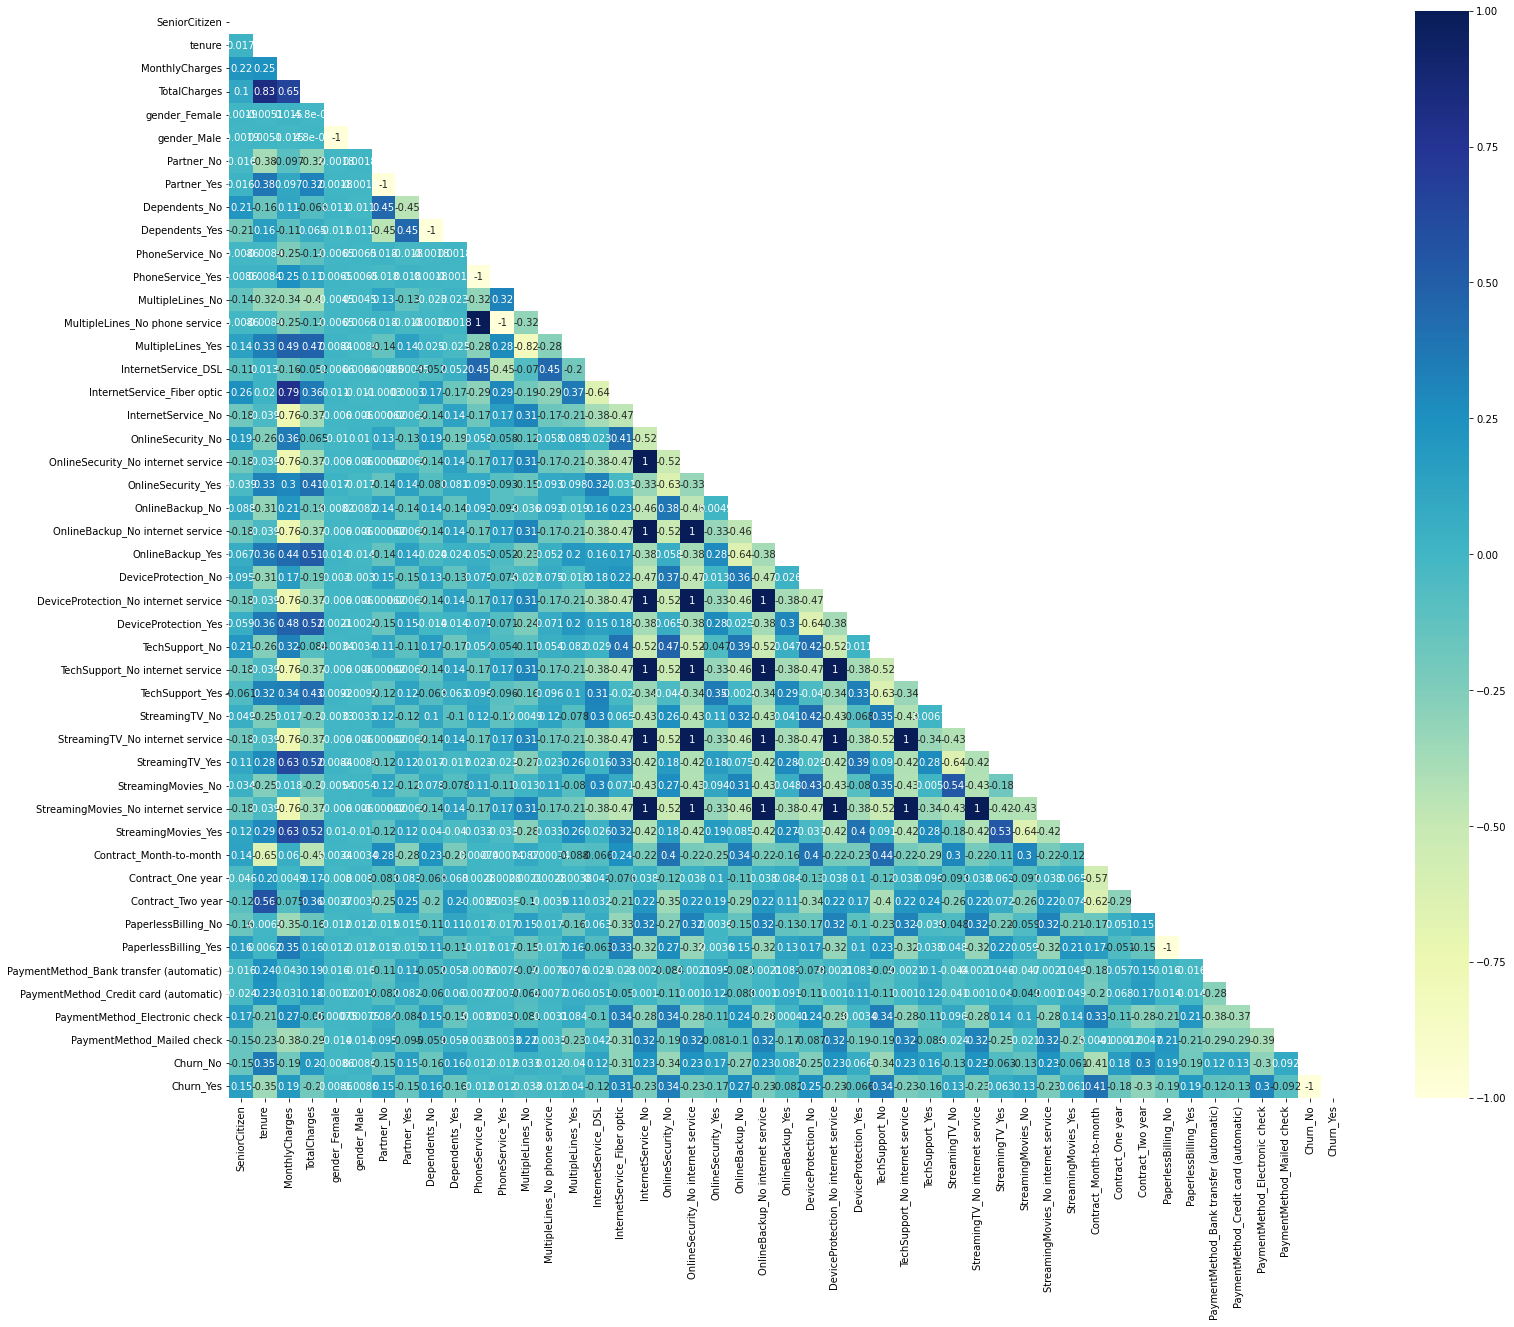

In [42]:
#Lets visualize overall correlations between all columns with each other

plt.figure(figsize=(25,20))
mask = np.zeros_like(df3.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df3.corr(),cmap="YlGnBu",annot=True,linewidths=0, linecolor='white',cbar=True,mask=mask)

### Data Preprocessing

In [43]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

as we can see above TotalCharges column has some 11 missing values that we have to fill or drop before applying the algorithm. fill the missing values with the mean of the column concerned

In [44]:
df1["TotalCharges"].fillna(df1["TotalCharges"].mean(),inplace=True)

In [45]:
df1.head(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No  
2              Yes      Mailed check           53.85        108.15   Yes

In [46]:
# encoding target variable

from sklearn.preprocessing import LabelEncoder
df_encoded = df1.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_encoded.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [47]:
# split train-dev-test

from sklearn.model_selection import train_test_split

df_new = df_encoded.copy()
X = df_new.drop('Churn',axis=1)
y = df_new['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [48]:
# we will use min-max or normalization to scale our data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [49]:
print(y_train.value_counts())

0    2887
1    1057
Name: Churn, dtype: int64


As we can see our dataset is imbalanced, we will use **SMOTE (Over sampling by producing syntetic samples)** to balancing our dataset.

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy ='minority')
X_sm, y_sm = smote.fit_resample(X_train,y_train)
X_vsm, y_vsm = smote.fit_resample(X_val,y_val)

In [51]:
print(y_sm.value_counts())

0    2887
1    2887
Name: Churn, dtype: int64


In [52]:
import tensorflow as tf

data_train_1=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(10)
data_train_2=tf.data.Dataset.from_tensor_slices((X_sm,y_sm)).batch(10)
data_val_1=tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(10)
data_val_2=tf.data.Dataset.from_tensor_slices((X_vsm,y_vsm)).batch(10)

2021-11-22 17:05:22.664711: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
print(X_sm.shape)
print(y_sm.shape)
print(y_sm.value_counts())

(5774, 19)
(5774,)
0    2887
1    2887
Name: Churn, dtype: int64


## Model Building

### Sequential API

In [54]:
import tensorflow as tf
from functools import partial
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# model define
model = keras.Sequential(
    [
        keras.layers.Dense(20,input_shape=(19,),kernel_initializer='uniform', activation = 'relu'),
        keras.layers.Dense(10, kernel_initializer='uniform', activation='relu'),
        keras.layers.Dense(5, kernel_initializer='uniform', activation='relu'),
        keras.layers.Dense(1,kernel_initializer="uniform",activation="sigmoid"),
    ]
)

model.compile(optimizer ='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 2,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                400       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [57]:
# model training

history = model.fit(data_train_1,epochs=50,
                    validation_data=data_val_1,
                    callbacks=earlystop)

Epoch 1/50
395/395 [==============================] - 2s 4ms/step - loss: 0.5554 - accuracy: 0.7315 - val_loss: 0.4561 - val_accuracy: 0.7454
Epoch 2/50
395/395 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.7787 - val_loss: 0.4354 - val_accuracy: 0.8022
Epoch 3/50
395/395 [==============================] - 1s 3ms/step - loss: 0.4430 - accuracy: 0.7827 - val_loss: 0.4308 - val_accuracy: 0.7982
Epoch 4/50
395/395 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.7852 - val_loss: 0.4267 - val_accuracy: 0.8063
Epoch 5/50
395/395 [==============================] - 1s 3ms/step - loss: 0.4369 - accuracy: 0.7863 - val_loss: 0.4239 - val_accuracy: 0.8114
Epoch 6/50
395/395 [==============================] - 1s 4ms/step - loss: 0.4348 - accuracy: 0.7875 - val_loss: 0.4218 - val_accuracy: 0.8134
Epoch 00006: early stopping


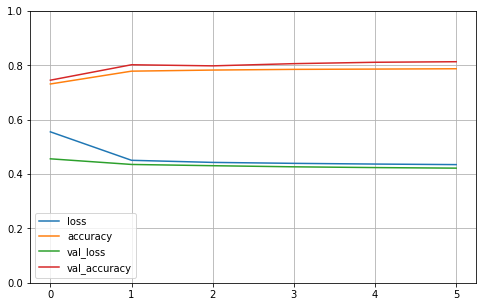

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [59]:
# model evaluating

model.evaluate(X_test,y_test)
y_pred = model.predict(X_test)
y_pred_actual = []
for ele in y_pred:
    if ele > 0.5:
        y_pred_actual.append(1)
    else :
        y_pred_actual.append(0)

67/67 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7345


In [60]:
 print("Classification Reports is:\n",classification_report(y_test,y_pred_actual))

Classification Reports is:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



### Functional API

In [61]:
# model define

np.random.seed(42) # randomseed for consistency
tf.random.set_seed(42)


inp = keras.layers.Input(shape=(19,))
dense1 = keras.layers.Dense(20, activation='relu')(inp) 
dense2 = keras.layers.Dense(10, activation='relu')(dense1)
dense3 = keras.layers.Dense(5, activation='relu')(dense2)
out = keras.layers.Dense(1, activation='sigmoid')(dense3)

model_func = tf.keras.models.Model(inputs=inp, outputs=out) 

model_func.compile(optimizer ='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_4 (Dense)             (None, 20)                400       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [63]:
# model training

history = model_func.fit(data_train_1,epochs=50,
                    validation_data=data_val_1)

Epoch 1/50
395/395 [==============================] - 2s 3ms/step - loss: 0.5187 - accuracy: 0.7383 - val_loss: 0.4382 - val_accuracy: 0.7961
Epoch 2/50
395/395 [==============================] - 1s 3ms/step - loss: 0.4413 - accuracy: 0.7817 - val_loss: 0.4268 - val_accuracy: 0.8073
Epoch 3/50
395/395 [==============================] - 1s 3ms/step - loss: 0.4342 - accuracy: 0.7863 - val_loss: 0.4219 - val_accuracy: 0.8083
Epoch 4/50
395/395 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.7883 - val_loss: 0.4192 - val_accuracy: 0.8073
Epoch 5/50
395/395 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.7911 - val_loss: 0.4170 - val_accuracy: 0.8103
Epoch 6/50
395/395 [==============================] - 1s 2ms/step - loss: 0.4242 - accuracy: 0.7911 - val_loss: 0.4162 - val_accuracy: 0.8134
Epoch 7/50
395/395 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.7941 - val_loss: 0.4149 - val_accuracy: 0.8124
Epoch 

In [64]:
# model evaluating

model_func.evaluate(X_test,y_test)
y_pred = model_func.predict(X_test)
y_pred_actual = []
for ele in y_pred:
    if ele > 0.5:
        y_pred_actual.append(1)
    else :
        y_pred_actual.append(0)
        
print("Classification Reports is:\n",classification_report(y_test,y_pred_actual))

67/67 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7922
Classification Reports is:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.62      0.55      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



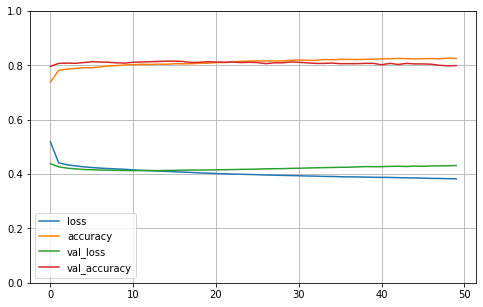

In [65]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

### Model Improvement

In [66]:
# model define
model_imp = keras.Sequential(
    [
        keras.layers.Dense(50,input_shape=(19,),kernel_initializer='he_uniform', activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(20, kernel_initializer='he_uniform', activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, kernel_initializer='he_uniform', activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1,kernel_initializer="glorot_uniform",activation="sigmoid"),
    ]
)

model_imp.compile(optimizer ='adamax',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                1000      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 20)                1020      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                      

In [68]:
history = model_imp.fit(data_train_1,epochs=100,
                        validation_data=data_val_1)

Epoch 1/100
395/395 [==============================] - 2s 3ms/step - loss: 0.7066 - accuracy: 0.5999 - val_loss: 0.5602 - val_accuracy: 0.7525
Epoch 2/100
395/395 [==============================] - 1s 3ms/step - loss: 0.6184 - accuracy: 0.6752 - val_loss: 0.5277 - val_accuracy: 0.7485
Epoch 3/100
395/395 [==============================] - 1s 3ms/step - loss: 0.5905 - accuracy: 0.7097 - val_loss: 0.5152 - val_accuracy: 0.7485
Epoch 4/100
395/395 [==============================] - 1s 3ms/step - loss: 0.5897 - accuracy: 0.7099 - val_loss: 0.5152 - val_accuracy: 0.7485
Epoch 5/100
395/395 [==============================] - 1s 3ms/step - loss: 0.5708 - accuracy: 0.7219 - val_loss: 0.5096 - val_accuracy: 0.7465
Epoch 6/100
395/395 [==============================] - 1s 3ms/step - loss: 0.5653 - accuracy: 0.7244 - val_loss: 0.5044 - val_accuracy: 0.7465
Epoch 7/100
395/395 [==============================] - 1s 3ms/step - loss: 0.5597 - accuracy: 0.7320 - val_loss: 0.5013 - val_accuracy: 0.7454

Epoch 58/100
395/395 [==============================] - 1s 3ms/step - loss: 0.4738 - accuracy: 0.7589 - val_loss: 0.4294 - val_accuracy: 0.7901
Epoch 59/100
395/395 [==============================] - 1s 3ms/step - loss: 0.4778 - accuracy: 0.7624 - val_loss: 0.4285 - val_accuracy: 0.7941
Epoch 60/100
395/395 [==============================] - 2s 4ms/step - loss: 0.4731 - accuracy: 0.7574 - val_loss: 0.4290 - val_accuracy: 0.7961
Epoch 61/100
395/395 [==============================] - 1s 4ms/step - loss: 0.4751 - accuracy: 0.7624 - val_loss: 0.4287 - val_accuracy: 0.7951
Epoch 62/100
395/395 [==============================] - 1s 3ms/step - loss: 0.4777 - accuracy: 0.7591 - val_loss: 0.4295 - val_accuracy: 0.7901
Epoch 63/100
395/395 [==============================] - 1s 3ms/step - loss: 0.4691 - accuracy: 0.7645 - val_loss: 0.4284 - val_accuracy: 0.7992
Epoch 64/100
395/395 [==============================] - 1s 3ms/step - loss: 0.4731 - accuracy: 0.7645 - val_loss: 0.4279 - val_accuracy:

In [69]:
# model evaluating

model_imp.evaluate(X_test,y_test)
y_pred = model_imp.predict(X_test)
y_pred_actual = []
for ele in y_pred:
    if ele > 0.5:
        y_pred_actual.append(1)
    else :
        y_pred_actual.append(0)
        
print("Classification Reports is:\n",classification_report(y_test,y_pred_actual))

67/67 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.7847
Classification Reports is:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.44      0.52       561

    accuracy                           0.78      2113
   macro avg       0.73      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



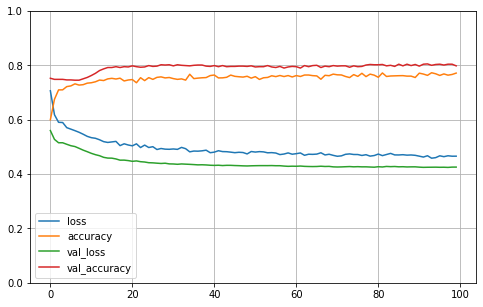

In [70]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

### Model Inference

In [71]:
X_test.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
4994       0              0        0           0  0.250000             1   
6828       0              0        1           1  0.111111             1   
755        1              1        0           0  0.277778             1   
404        1              0        0           0  0.277778             1   
981        1              0        1           1  0.555556             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
4994              0                1               2             0   
6828              0                2               1             1   
755               2                1               0             0   
404               0                2               1             1   
981               0                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
4994                 0            0            2                2         0   
6828                 1            1            1                1         2   
755                  2            0            2                2         0   
404                  1            1            1                1         2   
981                  1            1            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
4994                 1              2        0.773792      0.198691  
6828                 0              3        0.006477      0.021100  
755                  1              2        0.798705      0.210473  
404                  1              3        0.012955      0.046221  
981                  0              3        0.011958      0.091173

In [72]:
new_data = [{
    'gender':'Female',
    'SeniorCitizen':0,
    'Partner':'No',
    'Dependents':'No',
    'tenure':26,
    'PhoneService':'No',
    'MultipleLines':'No',
    'InternetService':'Fiber optic',
    'OnlineSecurity':'No',
    'OnlineBackup':'No',
    'DeviceProtection':'No',
    'TechSupport':'No',
    'StreamingTV':'NO',
    'StreamingMovies':'NO',
    'Contract':'Two year',
    'PaperlessBilling':'No',
    'PaymentMethod': 'Credit card (automatic)',
    'MonthlyCharges':102,
    'TotalCharges':846}]
new_data = pd.DataFrame(new_data,index=[1])
new_data

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
1  Female              0      No         No      26           No   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
1            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
1          No          NO              NO  Two year               No   

             PaymentMethod  MonthlyCharges  TotalCharges  
1  Credit card (automatic)             102           846

In [73]:
sample= new_data.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
sample[cols_to_scale] = scaler.transform(sample[cols_to_scale])
sample.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1       0              0        0           0  0.361111             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1              0                0               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
1                 0              0        0.833084      0.095448

In [74]:
pred = model_func.predict(sample)

if pred>0.5:
    print('Churn')
else:
    print('Not Churn')

Not Churn


## Overall Analysis

In this kernel I use telco customer data to classify telco customers. It aims to predict the customer, which is called churn. In this dataset, most of the variables are categorical variables with binom values. In general, the results from Eda shows several importance insight including:

- Target Columns are Imbalanced Variable
- Almost 40% of month to month contract have churned
- There is no need to make a special focus on gender type in order retain customers
- Company should deal with more with electronic check payment method and make some precautions
- Company should make some ads and campaigns in order to attract customers with fiber optic internet service
- Company may prioritize to organize campaigns and ads towards customers without partners in order to retain them in the company
- Customers without dependents are more likely to churn from the company
- Senior citizen have very high rate of churn that the company should take of seriously so as to retain them
- Providing enough technical support to the customers is very important for customer retention.


**Model Analysis**

I created an Artificial Neural Network model using the Sequential API and the Functional API for predicting customer churn. Before build the model, I decided to balance the dataset to get better results. 

The first model I built using the `Sequential API` with an Input layer, 2 hidden layers and an output layer. Then for this model I use Adam optimizer. So that after the train with 50 epochs of the data that has been prepared, the following results are obtained:

- Accuracy : 0.73
- Loss: 0.46

Then for the second model, I used the `Functional API`, just like before I created 2 hidden layers in this model and used the same optimizer. After training the data, this model shows better results than the previous model using the sequential API with the following results :

- Loss: 0.45 
- Accuracy: 0.79

The difference with the sequential API model, I train this model without doing callbacks so that the training process is carried out according to the specified number of epochs to completion.

I do model improvements cause the results of the training model using the sequential API are still lacking, I decided to do a model improvement on the model with several parameters including: adding dropouts and also batch normalizer in each layer. It also aims to minimize overfitting. then I use 'he_uniform' as kernel_initializer and the optimizer used is Adamax. And this model shows a significant change in increasing accuracy, and a slight change in loss. 



